# Regresión lineal con descenso del gradiente y selección de características

### Hecho por: Jose Barquero Diaz
###            Brandon Calderon Cubero
###            Sebastian Vargas

En este notebook, tiene como objetivo crear un modelo predictivo de precios de viviendas y usar técnicas estadísticas para la selección de características que permita mejorar las predicciones del modelo, así como el uso herramientas de visualización de datos para hacer análisis de características. 

## 1. Exploración y limpieza del dataset

### 1.1. Carga del Dataset y configuracion del entorno

En este apartado se cargan las librerias correspondientes para poder graficar y generar el modelo de IA, como se logra observar, se usara pandas, numpy, matplotlib, seaborn, sklearn.

In [37]:
# Install dependencies as needed:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Aqui se carga el dataset, el cual es necesario para poder generar el entrenamiento, validacion y testeo del modelo, ademas en esta seccion la variable data_copy, guarda una copia del conjunto del dataset, para poder validarla despues con respecto a data( el cual sufrio normalizacion), donde data_copy no esta normalizado.
El print de data.head(), imprime el valor de los primeros 5 datos del dataset de data.

In [38]:
# Load the data
data = pd.read_csv('data.csv')

# Create a copy of the data for manipulation
data_copy = data.copy()

# Print the first few rows of the data
print(data.head())

   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  


### 1.2. Analisis del Dataset

1. Square_Footage: El tamaño de la casa en pies cuadrados. Las casas más grandes suelen tener precios más altos.
2. Num_Bedrooms: El número de dormitorios en la casa. Un mayor número de dormitorios generalmente aumenta el valor de una vivienda.
3. Num_Bathrooms: El número de baños en la casa. Las casas con más baños suelen tener un precio más alto.
4. Year_built: El año de construcción de la casa. Las casas más antiguas pueden tener un precio más bajo debido al desgaste.
5. Lot_size: El tamaño del terreno donde se construye la casa, medido en acres. Los terrenos más grandes tienden a agregar valor a una propiedad.
6. Garage_Size: El número de autos que caben en el garaje. Las casas con garajes más grandes suelen ser más caras.
7. neighborhood_Quality: Una calificación de la calidad del vecindario en una escala del 1 al 10, donde 10 indica un vecindario de alta calidad. Los mejores vecindarios suelen tener precios más altos. 
8. House_Price (Variable Objetivo): El precio de la casa, que es la variable dependiente que pretende predecir.

In [ ]:
# Análisis exploratorio de datos (EDA)

data.info() # brinda informacion de los datos como el tipo de dato, cantidad de datos no nulos, etc

data.describe() # brinda estadisticas descriptivas de los datos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


### Observaciones del Análisis Exploratorio

A partir del análisis inicial del conjunto de datos, se pueden destacar los siguientes puntos clave:

El dataset contiene 1000 observaciones completas (sin valores nulos) y 8 columnas, ademas que lot_size y house_price se maneja como flotante.

El precio promedio de las casas (House_Price) es de aproximadamente $618,610, con un valor mínimo de $111,629 y un valor máximo de $1,108,237.

El área promedio de las casas es de 2815.42 pies cuadrados, mientras que el tamaño del lote tiene una media de 2.77 acres, pero con un mínimo de 0.506,hay que validar el 0.506 por el tamano de la casa.

Las viviendas fueron construidas entre 1950 y 2022, con un promedio cercano al 1986.

En promedio, las casas tienen 3 dormitorios y 2 baños, lo que representa una distribución común en viviendas familiares.

La media en la calidad del vecindario es de 6.18 sobre 10, con un rango que va de 1 a 10.

Hay casas sin garaje (valor 0) y con hasta 2 espacios de garaje, con una media de 1.02, se tiene que tomar en cuenta a evaluacion este feature.

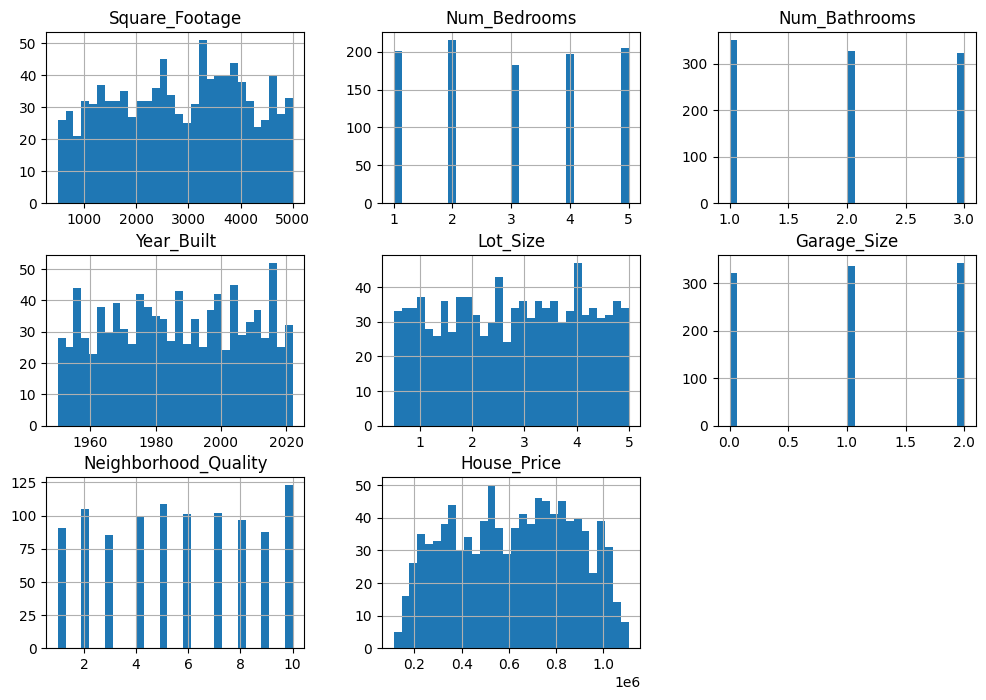

In [ ]:
data.hist(figsize=(12, 8), bins=30) # histograma de los datos para ver la distribucion de los datos en cada columna de la data 
plt.show() # muestra el histograma de los datos 

### En los histogramas se pueden observar los siguientes datos: 
Square_Footage: La distribución es relativamente uniforme, aunque con una ligera concentración entre los 2000 y 4000 pies cuadrados. 

Num_Bedrooms y Num_Bathrooms: Estas variables tienen una distribución discreta. La mayoría de las casas tienen entre 1 y 5 dormitorios, y entre 1 y 3 baños.

Year_Built: La variable muestra una distribución más o menos uniforme, con un leve aumento en las construcciones recientes (años 2000-2020).

Lot_Size: Se observa una distribución bastante homogénea, aunque algunas propiedades tienen tamanos menores o muy mayores al promedio.

Garage_Size: Claramente categórica, donde la mayoría de las viviendas tienen 1 o 2 espacios de garaje, pero también hay muchas casas sin garaje, se tiene que validar si este tendra una gran repercusion en el modelo.

Neighborhood_Quality: Aunque es una variable ordinal (de 1 a 10), se observa una concentración moderada en valores altos (2,5,6,7 y 10).

House_Price: La distribución es similar a una normal con ligera asimetría hacia la derecha. La mayoría de los precios se concentran entre $400,000 y $900,000, con pocos valores extremos hacia ambos lados.

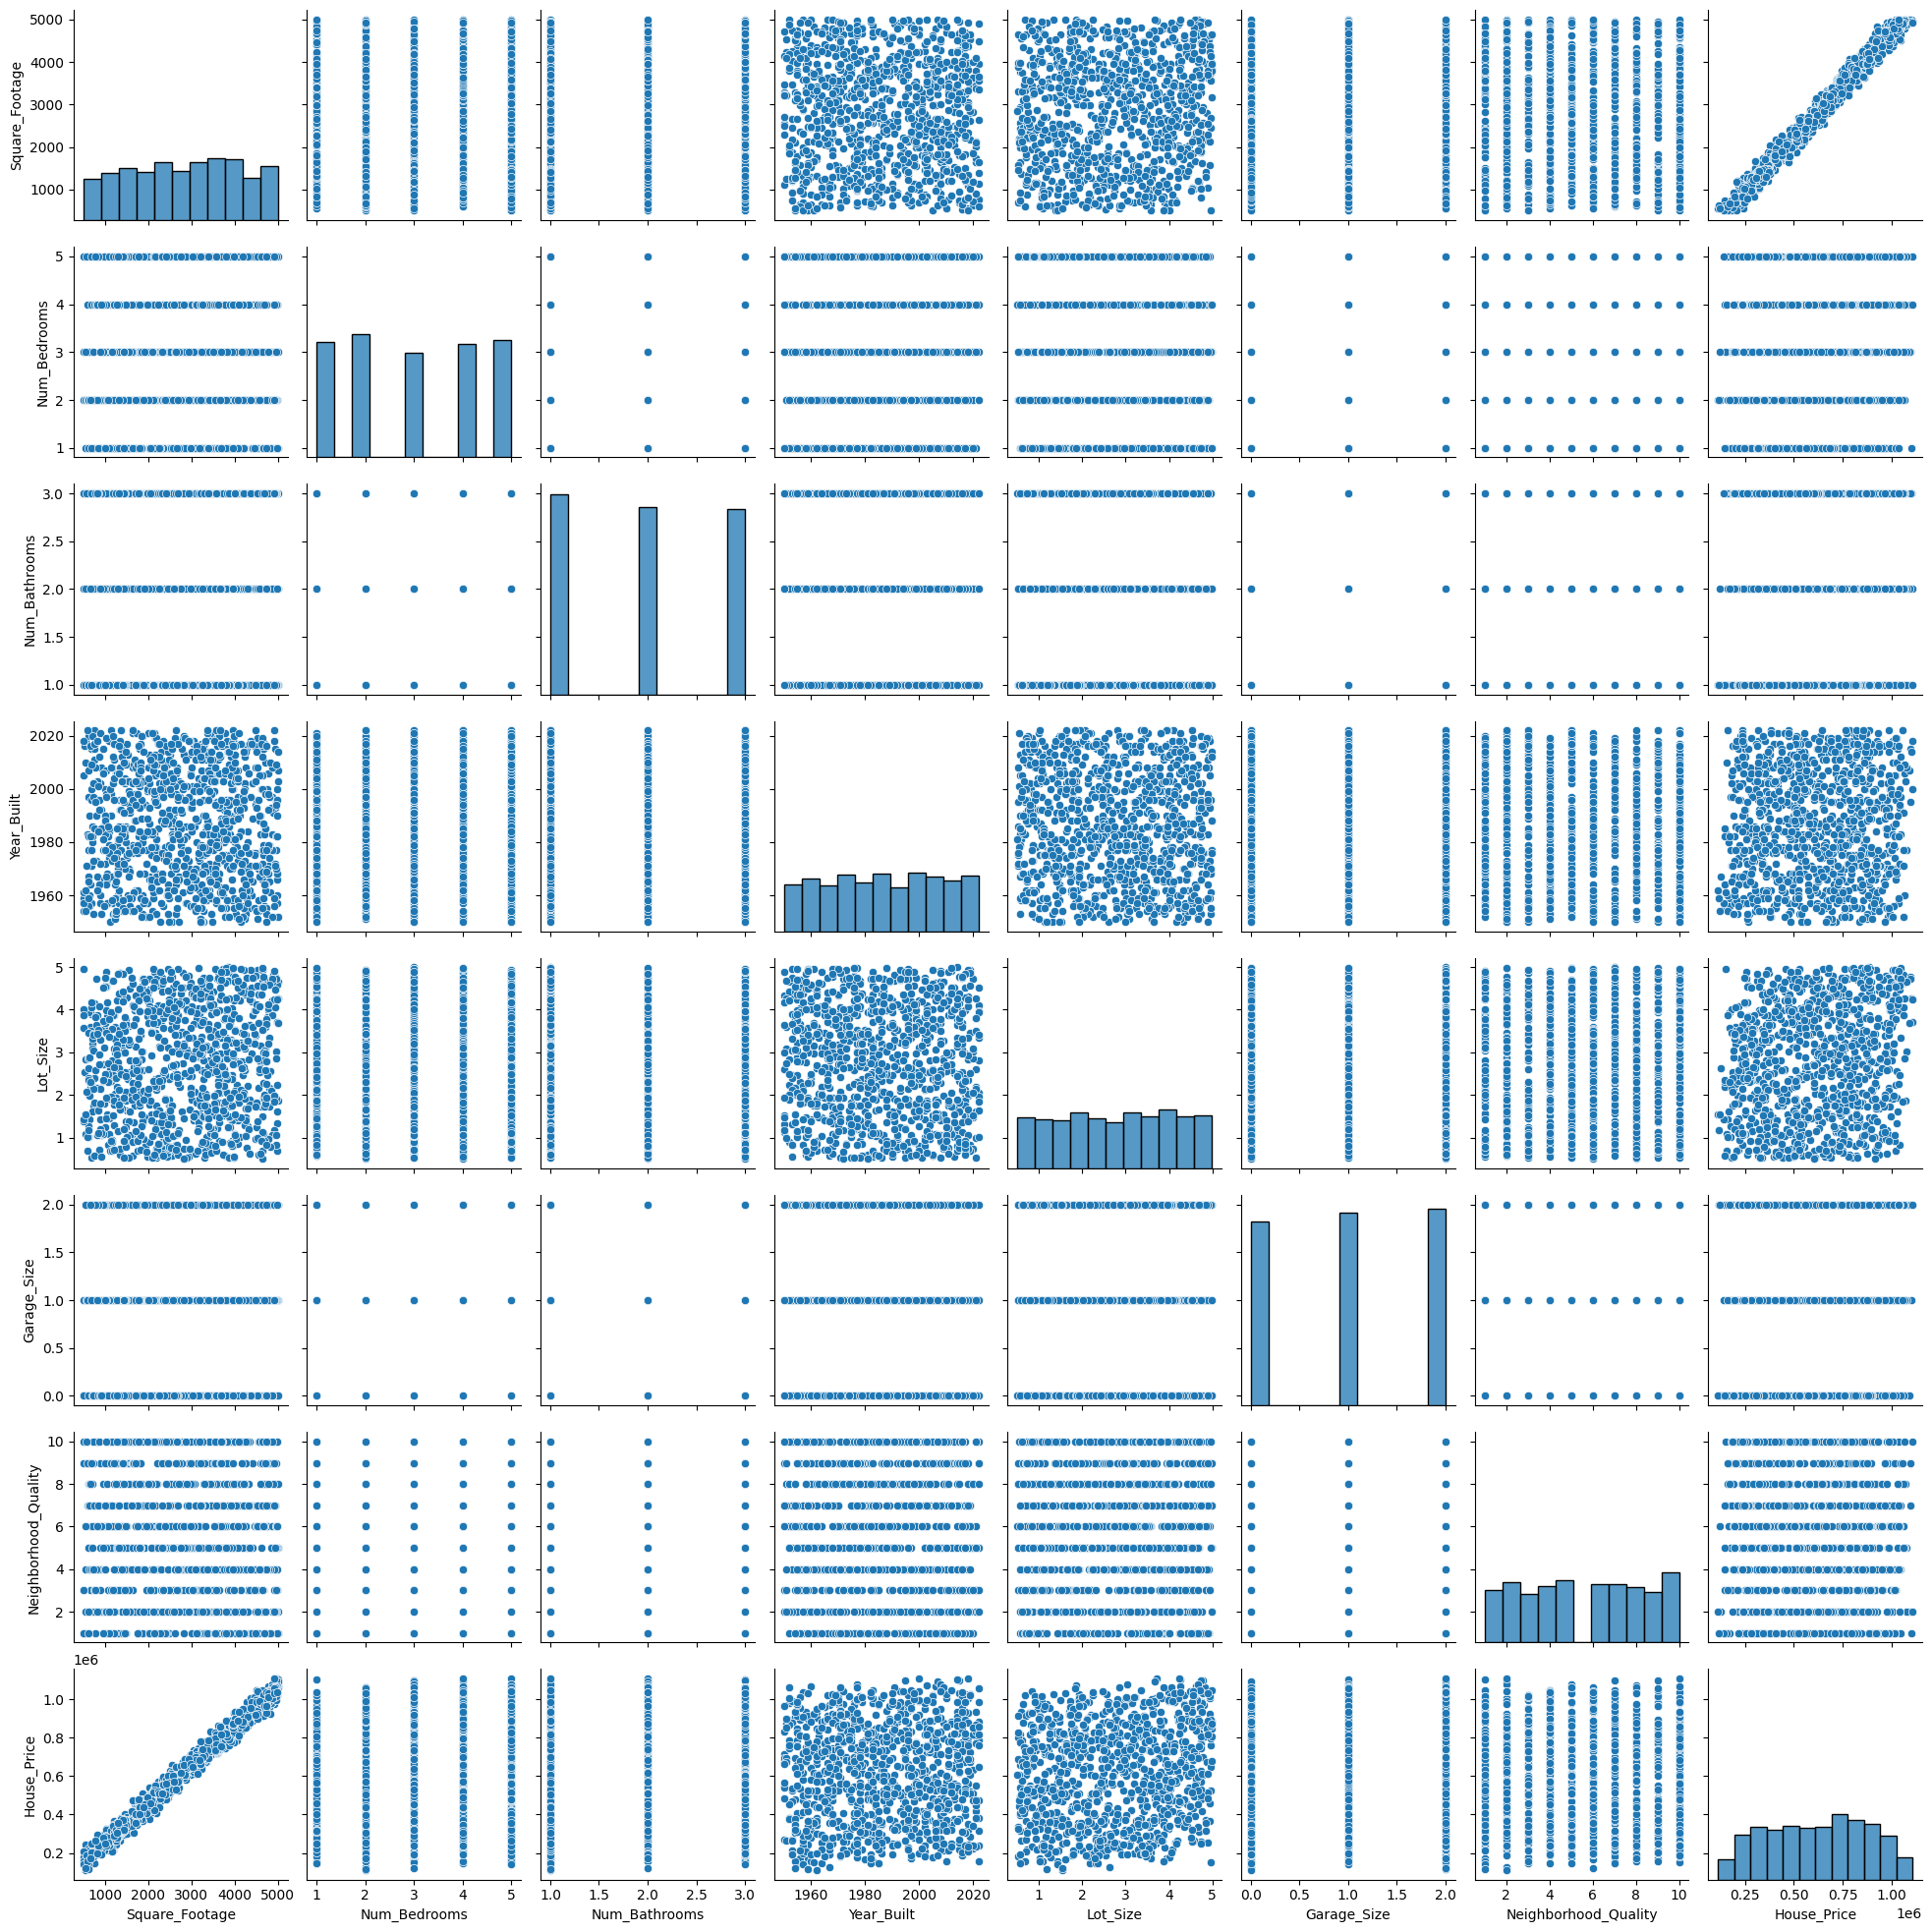

In [ ]:
sns.pairplot(data) # grafico de pares para ver la relacion entre las variables de la data

In [ ]:
0# Definir función para detectar valores atípicos con IQR
def detectar_outliers_iqr(df): # df es un DataFrame de pandas que contiene solo variables numéricas

    Q1 = df.quantile(0.25) # calcula el primer cuartil
    Q3 = df.quantile(0.75) # calcula el tercer cuartil
    IQR = Q3 - Q1 # calcula el rango intercuartil
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)) # calcula los valores atípicos por variable usando el rango intercuartil (IQR)
    return outliers # retorna los valores atípicos detectados por variable en un DataFrame


# Aplicar la función al dataset
outliers = detectar_outliers_iqr(data.select_dtypes(include=[np.number])) # detecta valores atípicos en las variables numéricas del dataset data 
print(outliers.sum())  # Cantidad de valores atípicos por variable en el dataset data 

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


Como se logra observar, en los features no hay ningun dato atipico que pueda afectar el aprendizaje del modelo, ya que todos los datos obtenidos fueron 0.

## 2. Selección de características

### 2.1. Análisis de Correlación para Features Numéricos

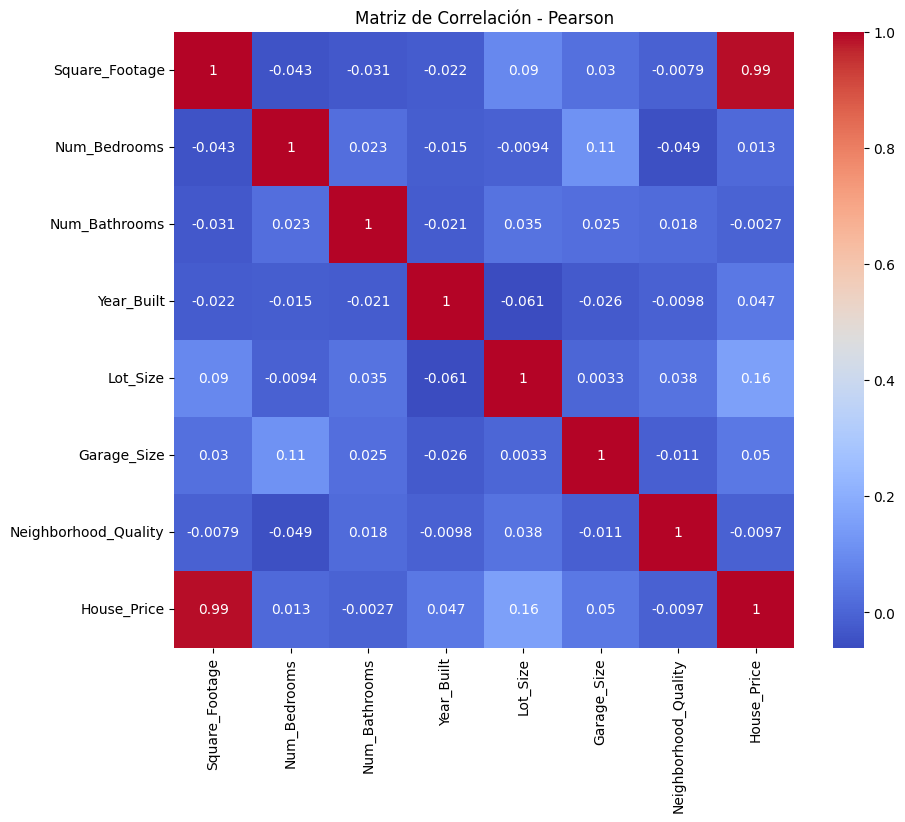

In [ ]:
correlation_matrix = data.corr(method="spearman") # calcula la matriz de correlación de Spearman
plt.figure(figsize=(10, 8)) # tamaño de la figura del gráfico de la matriz de correlación de Spearman
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') # grafica la matriz de correlación de Spearman con los coeficientes de correlación
plt.title('Matriz de Correlación - Pearson') # título del gráfico de la matriz de correlación de Spearman 
plt.show() # muestra el gráfico de la matriz de correlación de Spearman 

Tras identificar variables altamente correlacionadas (con un coeficiente mayor a 0.8 o menor a -0.8) podemos deducir:
- El único par de variables altamente correlacionadas es Square_Footage con House_Price
- Ninguna otra variable tiene una correlación extrema con otra.
- Garage_Size y Year_Built tienen correlaciones bajas con House_Price (~0.05), lo que sugiere que no afectan mucho el precio.
- Num_Bathrooms y Neighborhood_Quality tiene correlacion aun mas bajas con House_Price (~0.01), no tiene un impacto significativo en el precio de la casa

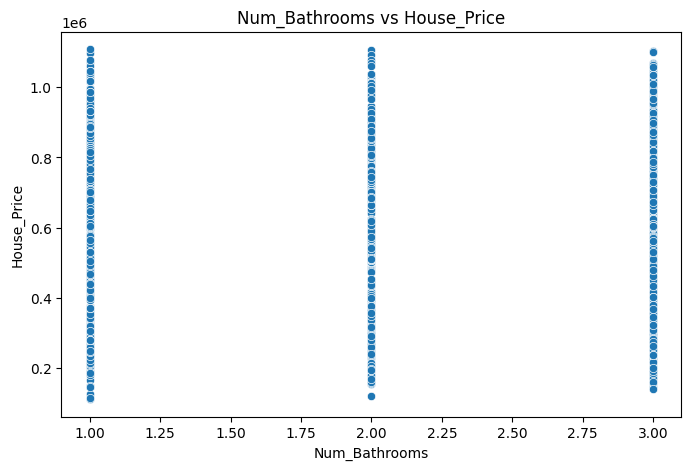

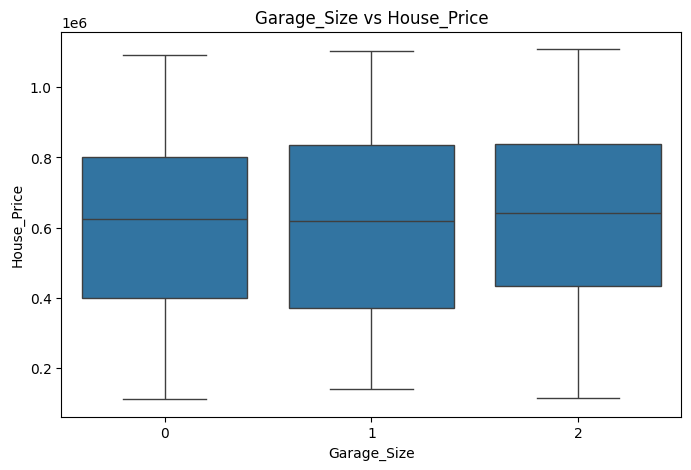

In [ ]:
# Scatter plot Num_Bathrooms vs House_Price
plt.figure(figsize=(8, 5)) # tamaño de la figura del gráfico de dispersión de Num_Bathrooms vs House_Price
sns.scatterplot(x=data['Num_Bathrooms'], y=data['House_Price']) # gráfico de dispersión de Num_Bathrooms vs House_Price
plt.title("Num_Bathrooms vs House_Price") # título del gráfico de dispersión de Num_Bathrooms vs House_Price
plt.show() # muestra el gráfico de dispersión de Num_Bathrooms vs House_Price

# Boxplot Garage_Size vs House_Price
plt.figure(figsize=(8, 5)) # tamaño de la figura del gráfico de caja de Garage_Size vs House_Price
sns.boxplot(x=data['Garage_Size'], y=data['House_Price']) # gráfico de caja de Garage_Size vs House_Price
plt.title("Garage_Size vs House_Price") # título del gráfico de caja de Garage_Size vs House_Price
plt.show() # muestra el gráfico de caja de Garage_Size vs House_Price


### 2.2. Manejo de Features Ordinales 

Neighborhood_Quality es una variable ordinal, ya que tiene un orden lógico (de 1 a 10), donde 10 representa una mejor calidad del vecindario que 1, pero la diferencia entre niveles no es necesariamente uniforme (es decir, la diferencia entre 8 y 9 puede no ser la misma que entre 2 y 3).

In [ ]:
data = pd.get_dummies(data, columns=['Neighborhood_Quality'], prefix='NQ') # codifica las variables categóricas de Neighborhood_Quality en variables dummy 

In [ ]:
data.head() # muestra las primeras filas de la data con las variables dummy de Neighborhood_Quality

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,House_Price,NQ_1,NQ_2,NQ_3,NQ_4,NQ_5,NQ_6,NQ_7,NQ_8,NQ_9,NQ_10
0,1360,2,1,1981,0.599637,0,2.623829e+05,False,False,False,False,True,False,False,False,False,False
1,4272,3,3,2016,4.753014,1,9.852609e+05,False,False,False,False,False,True,False,False,False,False
2,3592,1,2,2016,3.634823,0,7.779774e+05,False,False,False,False,False,False,False,False,True,False
3,966,1,2,1977,2.730667,1,2.296989e+05,False,False,False,False,False,False,False,True,False,False
4,4926,2,1,1993,4.699073,0,1.041741e+06,False,False,False,False,False,False,False,True,False,False


Se realizó una transformación de la variable ordinal Neighborhood_Quality mediante codificación one-hot utilizando pd.get_dummies(), aunque la variable tiene un orden lógico (1 a 10), su relación con el precio no necesariamente es lineal ni equidistante entre niveles, Por eso se optó por representarla con variables dummy (NQ_1 a NQ_10), lo que permite al modelo tratar cada categoría de forma independiente.

### 2.3. Aplicar Transformaciones a los Datos

## 3. Implementación de regresión lineal con descenso del gradiente

In [ ]:
def derivada_L_w(x, y_pred, y): # calcula la derivada de L respecto a w
    '''
    x (array-like): Vector de características.
    y_pred (scalar): Predicción de la regresión lineal.
    y (scalar): Valor real.
    '''
    return 2*x*(y_pred - y) # retorna la derivada de L respecto a w

def derivada_L_b(x, y_pred, y): # calcula la derivada de L respecto a b
    '''
    Calcula el resultado de la derivada de L respecto b
    2/n * sum(y_pred - y)
    '''
    return 2 * (y_pred - y) # retorna la derivada de L respecto a b

def modelo(x, w, b): # calcula la regresión lineal basada en los parámetros w y b con respecto a x
    '''
    Calcula la regresión lineal basada en los parámetros w y b con respecto a x.

    Parámetros:
    x (array-like): Vector de características.
    w (array-like): Vector de pesos.
    b (float): Bias (también conocido como sesgo).

    Retorna:
    array-like: Resultado de la regresión lineal.
    '''
    # Producto punto entre x y w
    return np.dot(x, w) + b # retorna el producto punto entre x y w más b


def MSE(y_pred, y):  # calcula el error cuadrático medio
    '''
    Calcula el error cuadrático medio.'
    '''
    return np.mean((y_pred - y) ** 2)



In [ ]:
# Divida el dataset en train/validation/test (70%-15%-15%)

# normalizar los datos
scaler = StandardScaler() # normaliza los datos
data_scaled = scaler.fit_transform(data) # normaliza la data
data = pd.DataFrame(data_scaled, columns=data.columns) # convierte la data normalizada en un DataFrame de pandas

X = data.drop(columns=['House_Price']) # elimina la columna House_Price de la data
y = data['House_Price'] # selecciona la columna House_Price de la data

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) # divide la data en train y temp (70% train, 30% temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # divide la data temp en validation y test (15% validation, 15% test)

print(X_train.shape, X_val.shape, X_test.shape) # imprime las dimensiones de X_train, X_val y X_test

(700, 16) (150, 16) (150, 16)


In [49]:
def ModeloRegresionLineal(X_train, y_train, X_val, y_val, epochs=1000, plotEvery=10, alfa=0.01, ):

    
    # Definir hiperparámetros
    epochs = epochs
    plotEvery = epochs//plotEvery
    alfa = alfa

    # Crear una lista de pesos iniciales aleatorios
    np.random.seed(0) 
    w = np.random.default_rng().random(X_train.shape[1])
    b = np.random.default_rng().random()

    # Inicializar listas para almacenar errores y derivadas
    errorBySample = []
    derivadas_w = []
    derivadas_b = []

    validation_errors = []
    training_errors = []

    for epoch in range(epochs):
        samples = zip(X_train.values, y_train)  
        for (x, y) in samples:
            y_pred = modelo(x, w, b)
            error = MSE(y_pred, y)
            errorBySample.append(error)

            derivadaW = derivada_L_w(x, y_pred, y)
            derivadas_w.append(derivadaW)

            derivadaB = derivada_L_b(x, y_pred, y)
            derivadas_b.append(derivadaB)


        # Promediamos las derivadas para actualizar los pesos y el bias
        promedio_derivada_w = np.mean(derivadas_w, axis=0)
        w = w - alfa * promedio_derivada_w

        promedio_derivada_b = np.mean(derivadas_b)
        b = b - alfa * promedio_derivada_b

        # Promediamos el error para obtener el costo
        costError = np.mean(errorBySample)
        training_errors.append(costError)


        # Calculamos el error de validación
        y_val_pred = modelo(X_val.values, w, b)
        val_error = MSE(y_val_pred, y_val)
        validation_errors.append(val_error)

        # Graficamos el error de validación cada n épocas
        if (epoch % plotEvery) == 0:
            print(f"Epoca {epoch}, valor de función de perdida (Loss Function) = {costError:.5F}, nuevo valor de W = {w}, B = {b:.5F}")
        
        
        #Reiniciamos
        errorBySample = []
        derivadas_w = []
        derivadas_b = []
        
    print(f"Epoca {epoch}, valor de función de perdida (Loss Function) = {costError:.5F}, nuevo valor de W = {w}, B = {b:.5F}")
    return w, b, validation_errors, training_errors, costError, val_error

In [50]:
epochs = 250
print("a = 0.005\n")
ModeloRegresionLineal(X_train, y_train, X_val, y_val, epochs, 2, 0.005)

print("\na = 0.01\n")
ModeloRegresionLineal(X_train, y_train, X_val, y_val, epochs, 2, 0.01)

print("\na = 0.05\n")
ModeloRegresionLineal(X_train, y_train, X_val, y_val, epochs, 2, 0.05)

print("\na = 0.1\n")
ModeloRegresionLineal(X_train, y_train, X_val, y_val, epochs, 2, 0.1)

print("\na = 0.5\n")
ModeloRegresionLineal(X_train, y_train, X_val, y_val, epochs, 2, 0.5)

print("\na = 1.0\n")
ModeloRegresionLineal(X_train, y_train, X_val, y_val, epochs, 2, 1.0)

a = 0.005

Epoca 0, valor de función de perdida (Loss Function) = 3.37085, nuevo valor de W = [0.04583237 0.22186623 0.96138914 0.17054899 0.94020236 0.53494606
 0.31338866 0.81802298 0.25459552 0.98278349 0.62850437 0.78745373
 0.65978372 0.65145704 0.12179454 0.37444745], B = 0.10251
Epoca 125, valor de función de perdida (Loss Function) = 0.31297, nuevo valor de W = [0.67960314 0.06366223 0.29460332 0.15800113 0.36198677 0.16788643
 0.50529203 0.65926075 0.43289266 0.68242499 0.59534645 0.62000486
 0.61432718 0.55919696 0.40275045 0.54409123], B = 0.03995
Epoca 249, valor de función de perdida (Loss Function) = 0.03366, nuevo valor de W = [0.88411005 0.04650043 0.10636678 0.11836703 0.17181197 0.06477366
 0.53678016 0.60285392 0.4918521  0.60051695 0.58847301 0.57925795
 0.58733122 0.5492092  0.49016101 0.59597046], B = 0.01408

a = 0.01

Epoca 0, valor de función de perdida (Loss Function) = 2.65697, nuevo valor de W = [0.17905478 0.57423655 0.13184135 0.04598061 0.37825247 0.65559

(array([ 4.04443131e+44,  2.15284707e+44,  1.73863602e+44,  6.26294551e+44,
         1.37806774e+43,  2.99440537e+43,  2.15608069e+45, -3.85027674e+44,
         1.56097025e+44, -1.55885471e+44, -1.44006000e+45, -1.81062193e+44,
         2.29695935e+43, -1.62556098e+43,  1.05998999e+44, -8.48982273e+43]),
 np.float64(1.5388308364188986e+44),
 [np.float64(5.658155138444368),
  np.float64(9.19083331369631),
  np.float64(16.59282395134209),
  np.float64(31.754606711167252),
  np.float64(62.94337439258348),
  np.float64(127.71444217302536),
  np.float64(263.761431782312),
  np.float64(552.3802772718108),
  np.float64(1170.1212749404121),
  np.float64(2503.044493477471),
  np.float64(5397.942861835749),
  np.float64(11723.65446995247),
  np.float64(25612.250089204423),
  np.float64(56241.72444990224),
  np.float64(124028.47587961209),
  np.float64(274534.2898111606),
  np.float64(609573.1937832015),
  np.float64(1357176.4653025365),
  np.float64(3028686.1649789396),
  np.float64(6772649.5971

In [51]:
w, b, val_errors, train_errors, train_MSE, val_MSE = ModeloRegresionLineal(X_train, y_train, X_val, y_val, epochs, 2, 0.05)

Epoca 0, valor de función de perdida (Loss Function) = 2.08459, nuevo valor de W = [0.83370793 0.17549792 0.05899484 0.84129492 0.86810217 0.1274748
 0.5548592  0.08502597 0.68097408 0.46399478 0.31609391 0.45782768
 0.4594705  0.39332975 0.56828213 0.31612599], B = 0.29106
Epoca 125, valor de función de perdida (Loss Function) = 0.00141, nuevo valor de W = [0.9869134  0.05758825 0.02719386 0.08217469 0.07569098 0.01684166
 0.40643148 0.43196374 0.39024408 0.42547236 0.44164234 0.42719695
 0.42839699 0.41637669 0.40012674 0.46605954], B = 0.00005
Epoca 249, valor de función de perdida (Loss Function) = 0.00141, nuevo valor de W = [0.98692249 0.05759255 0.02719725 0.08217163 0.07568365 0.01683571
 0.40643089 0.4319647  0.39024181 0.42546924 0.44164324 0.42719846
 0.42839765 0.41637659 0.40012866 0.46605952], B = 0.00005


## 4. Análisis de sesgo y varianza

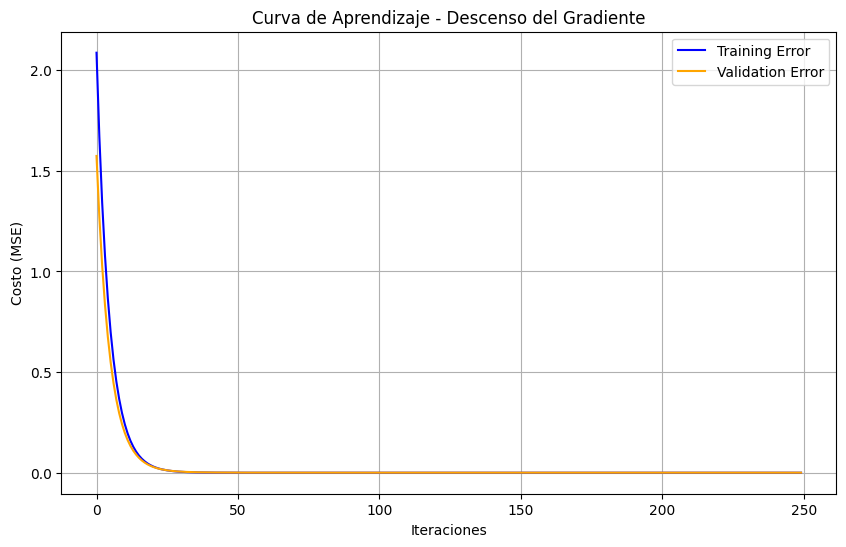

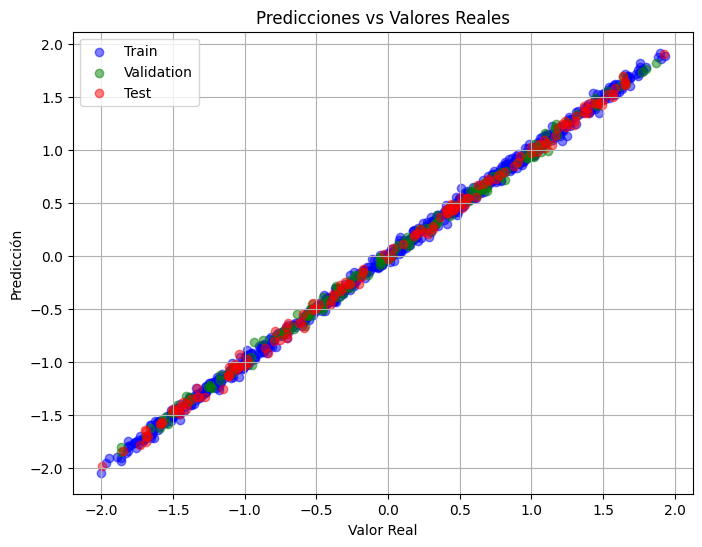

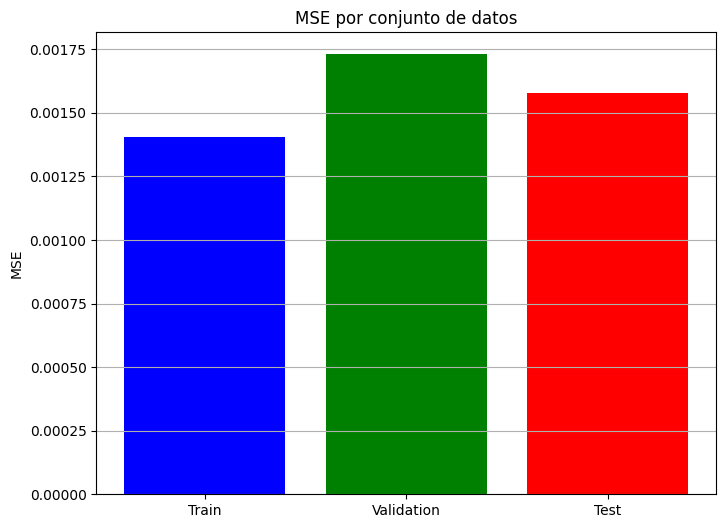

Score de entrenamiento: 99.99859
Score de validación: 99.99827
Score de prueba: 99.99842


In [53]:
# Test del modelo
y_pred = modelo(X_test.values, w, b)
test_MSE = MSE(y_pred, y_test)

# Curva de aprendizaje
plt.figure(figsize=(10,6))
plt.plot(range(epochs), train_errors, color='blue', label='Training Error')
plt.plot(range(epochs), val_errors, color='orange', label='Validation Error')
plt.xlabel('Iteraciones')
plt.ylabel('Costo (MSE)')
plt.title('Curva de Aprendizaje - Descenso del Gradiente')
plt.legend()
plt.grid()
plt.show()


# Predicciones
y_pred_train = X_train @ w
y_pred_val = X_val @ w
y_pred_test = X_test @ w

# Predicciones vs valores reales
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_pred_train, color='blue', label='Train', alpha=0.5)
plt.scatter(y_val, y_pred_val, color='green', label='Validation', alpha=0.5)
plt.scatter(y_test, y_pred_test, color='red', label='Test', alpha=0.5)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.grid()
plt.show()

# MSE por cada conjunto
errors = [train_MSE, val_MSE, test_MSE]
labels = ['Train', 'Validation', 'Test']
plt.figure(figsize=(8,6))
plt.bar(labels, errors, color=['blue', 'green', 'red'])
plt.title('MSE por conjunto de datos')
plt.ylabel('MSE')
plt.grid(axis='y')
plt.show()

print(f"Score de entrenamiento: {100-train_MSE:.5F}")
print(f"Score de validación: {100-val_MSE:.5F}")
print(f"Score de prueba: {100-test_MSE:.5F}")


In [ ]:
# Normalizar los datos
#  TODO: Con normalizacion vs sin normalizacion
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_copy)
data_copy = pd.DataFrame(data_scaled, columns=data_copy.columns)

X = data_copy.drop(columns=['House_Price'])
y = data_copy['House_Price']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


epochs = 500
w, b, val_errors, train_errors, train_MSE, val_MSE = ModeloRegresionLineal(X_train, y_train, X_val, y_val, epochs, 10, 0.005)
print(f"Valor de W = {w}, B = {b:.5F}")



Epoca 0, valor de función de perdida (Loss Function) = 1.40187, nuevo valor de W = [0.8728792  0.0587914  0.1041219  0.00329755 0.80427269 0.52535326
 0.25608279], B = 0.70641
Epoca 50, valor de función de perdida (Loss Function) = 0.51250, nuevo valor de W = [0.88404546 0.04355058 0.06205723 0.04544287 0.51864271 0.32286529
 0.14681207], B = 0.43103
Epoca 100, valor de función de perdida (Loss Function) = 0.19046, nuevo valor de W = [0.90372382 0.03974586 0.04120241 0.06625181 0.34644698 0.20236404
 0.08404985], B = 0.26292
Epoca 150, valor de función de perdida (Loss Function) = 0.07229, nuevo valor de W = [0.92355749 0.04083519 0.03132893 0.07613132 0.24209505 0.13014342
 0.04810906], B = 0.16034
Epoca 200, valor de función de perdida (Loss Function) = 0.02835, nuevo valor de W = [0.94044999 0.04363422 0.02700353 0.08053544 0.17852534 0.08654017
 0.02760852], B = 0.09777
Epoca 250, valor de función de perdida (Loss Function) = 0.01180, nuevo valor de W = [0.95370744 0.04668786 0.025

In [ ]:
print(f"Score de entrenamiento (Sin Cambios): {100-train_MSE:.5F}")
print(f"Score de validación (Sin Cambios): {100-val_MSE:.5F}")
print(f"Score de prueba (Sin Cambios): {100-test_MSE:.5F}")

Score de entrenamiento (Sin Cambios): 99.99845
Score de validación (Sin Cambios): 99.99808
Score de prueba (Sin Cambios): 99.99842
